In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from textblob import TextBlob

In [2]:
data = pd.read_csv('Translated_EN_fixed.csv')
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('Unnamed: 0.1', inplace=True, axis=1)
print(len(data['Content']))

22904


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

text = data.at[3, 'Content']
print(text)

The Central Statistics Agency (BPS) of Papua Province stated that the percentage of poor people in the region during the last six months had increased by 0.16 percentage points, from 26.64 percent in March 2020 to 26.80 percent in September 2020. Head of BPS Papua Province Adriana Helena Carolina in Jayapura, Monday, said the percentage of poor people in Papua for urban areas increased by 0.12 percentage points to 4.59 percent (4.47 percent in March 2020) and rural areas rose by 0.19 percentage points to 35 points. 69 percent (35.50 percent in March 2020). "The role of food commodities in the poverty line is much greater than the role of non-food commodities, both urban and rural," he said, quoted by Antara, Monday (15/2). According to Adriana, in September 2020 the contribution of the food poverty line to the urban poverty line was 67.40 percent, while in rural areas it was 78.80 percent. "Food commodities that have a major influence on the poverty line of Papua Province in urban area

In [4]:
score = sia.polarity_scores(text)
print(score)

{'neg': 0.061, 'neu': 0.898, 'pos': 0.041, 'compound': -0.8294}


In [5]:
blob_score = TextBlob(text).sentiment.polarity
print(blob_score)

0.035874368686868684


In [6]:
count = 0
same_res = []
count_same_pos = 0
count_same_neg = 0

for i, w in enumerate(data['Content']):
    vader_score = sia.polarity_scores(w)
    blob_score = TextBlob(w).sentiment.polarity
    
    v_pos = vader_score['pos']
    v_neg = vader_score['neg']
    
    flag_v = 0
    flag_b = 0
    
    if(v_pos > v_neg):
        data.at[i, 'Vader Score'] = 1
        flag_v = 1
    else:
        data.at[i, 'Vader Score'] = 0
        
    if(blob_score > 0): 
        data.at[i, 'Blob Score'] = 1
        flag_b = 1
    else: 
        data.at[i, 'Blob Score'] = 0
        
    if(flag_v == flag_b):
        same_res.append(i)
        if(flag_v == 1):
            count_same_pos += 1
        else:
            count_same_neg += 1
    
    count += 1
    if (count%5 == 0):
        clear_output(wait=True)
        print("{0} processed out of {1} --- {2:.2f}%".format(count, len(data['Content']), (count/len(data['Content']))*100))
    elif (count == len(data['Content'])):
        clear_output(wait=True)
        print("{0} processed out of {1} --- {2:.2f}%".format(count, len(data['Content']), (count/len(data['Content']))*100))

22904 processed out of 22904 --- 100.00%


In [7]:
data
print(count_same_neg)

1579


In [8]:
data.to_csv('Translated - Vader and Blob.csv')

In [8]:
pos_v, neg_v = data['Vader Score'].value_counts()
pos_b, neg_b = data['Blob Score'].value_counts()

In [9]:
np_array_vader = []
np_array_blob = []

np_array_vader.append(pos_v)
np_array_vader.append(neg_v)

np_array_blob.append(pos_b)
np_array_blob.append(neg_b)

print(np_array_vader)
print(np_array_blob)

[19058, 3846]
[19938, 2966]


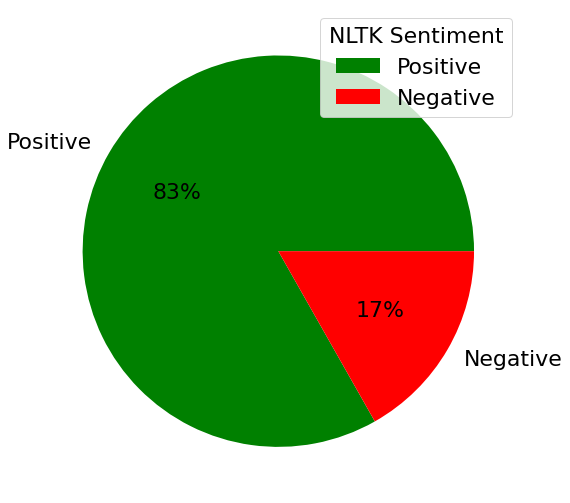

In [15]:
import matplotlib.pyplot as plt

mylabels = ["Positive", "Negative"]
mycolors = ["g", "r"]

plt.pie(np_array_vader, labels = mylabels, colors = mycolors, autopct="%.f%%")

plt.rcParams["figure.figsize"] = (16,9)
#plt.rcParams.update({'font.size': 22})
plt.legend(title = "NLTK Sentiment")
plt.rc('font', size=22)   
plt.show() 

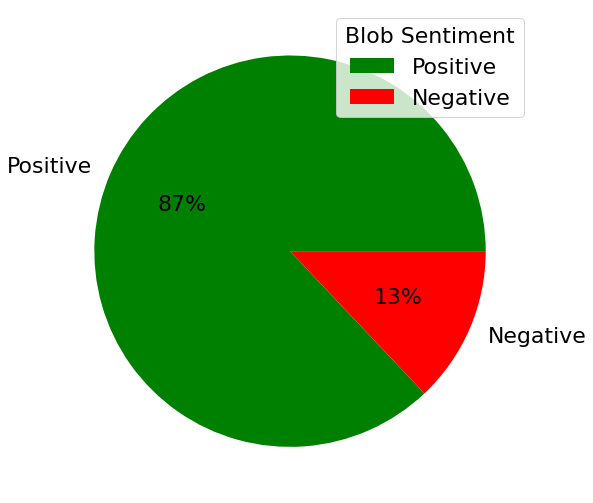

In [16]:
import matplotlib.pyplot as plt

mylabels = ["Positive", "Negative"]
mycolors = ["g", "r"]

plt.pie(np_array_blob, labels = mylabels, colors = mycolors, autopct="%.f%%")

plt.rcParams["figure.figsize"] = (16,9)
#plt.rcParams.update({'font.size': 22})
plt.legend(title = "Blob Sentiment")
plt.rc('font', size=22)   
plt.show() 

In [12]:
np_array_same = []

np_array_same.append(count_same_pos)
np_array_same.append(count_same_neg)

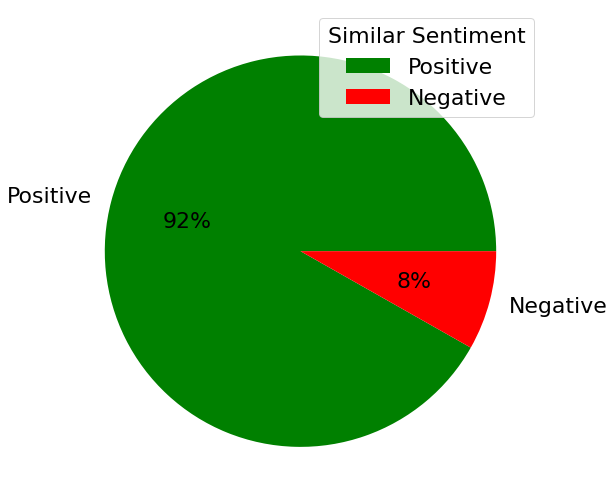

In [17]:
import matplotlib.pyplot as plt

mylabels = ["Positive", "Negative"]
mycolors = ["g", "r"]

plt.pie(np_array_same, labels = mylabels, colors = mycolors, autopct="%.f%%")

plt.rcParams["figure.figsize"] = (16,9)
#plt.rcParams.update({'font.size': 22})
plt.legend(title = "Similar Sentiment")
plt.rc('font', size=22)   
plt.show() 

In [15]:
print(count_same_pos + count_same_neg)

19250


In [16]:
#creating a dataframe with equal pos and neg

equal_df = pd.DataFrame()

In [17]:
equal_df

""


In [18]:
row = 0
count = 0

for i in same_res:
    equal_df.at[row, 'Original Array'] = i
    equal_df.at[row, 'Content'] = data.at[i, 'Content']
    equal_df.at[row, 'Vader Score'] = data.at[i, 'Vader Score']
    equal_df.at[row, 'Blob Score'] = data.at[i, 'Blob Score']
    
    if(data.at[i, 'Blob Score'] == data.at[i, 'Vader Score']):
        equal_df.at[row, 'Sentiment'] = data.at[i, 'Blob Score']
        
    row += 1
    count += 1
    
    if (count%5 == 0):
        clear_output(wait=True)
        print("{0} processed out of {1} --- {2:.2f}%".format(count, len(same_res), (count/len(same_res))*100))
    elif (count == len(same_res)):
        clear_output(wait=True)
        print("{0} processed out of {1} --- {2:.2f}%".format(count, len(same_res), (count/lenlen(same_res))*100))                                       

19250 processed out of 19250 --- 100.00%


In [19]:
equal_df

,Original Array,Content,Vader Score,Blob Score,Sentiment
0,0.0,The National Police Chief promised that the us...,1.0,1.0,1.0
1,1.0,"""There are still various costs involved in pro...",1.0,1.0,1.0
2,2.0,The World Trade Organization (WTO) has officia...,1.0,1.0,1.0
3,4.0,The Attorney General's Office (AGO) has again ...,0.0,0.0,0.0
4,5.0,"If the land is for national roads, there is ad...",1.0,1.0,1.0
...,...,...,...,...,...
19245,22899.0,The number of poor people in West Nusa Tenggar...,0.0,0.0,0.0
19246,22900.0,Aceh province is again the poorest area in Sum...,0.0,0.0,0.0
19247,22901.0,The Attorney General's Office (AGO) has named ...,0.0,0.0,0.0
19248,22902.0,The Minister of Maritime Affairs and Fisheries...,1.0,1.0,1.0


In [20]:
equal_df['Sentiment'].isnull().values.any()

False

In [21]:
equal_df = equal_df.sort_values('Sentiment')

In [26]:
equal_df = equal_df.reset_index(drop=True)

In [27]:
equal_df

,Original Array,Content,Vader Score,Blob Score,Sentiment
0,3247.0,"Member of Commission VII DPR RI, Mulyanto aske...",0.0,0.0,0.0
1,10085.0,PT. Bank Danamon Indonesia. ANNOUNCEMENT OF SE...,0.0,0.0,0.0
2,20866.0,Prime Minister Prayuth Faces No-Confidence Mot...,0.0,0.0,0.0
3,18324.0,The Fleet One Quick Response (F1QR) team at Ta...,0.0,0.0,0.0
4,10093.0,Chairman of the Indonesian Tire Entrepreneurs ...,0.0,0.0,0.0
...,...,...,...,...,...
19245,7856.0,"The merger of three sharia banks, which are su...",1.0,1.0,1.0
19246,7853.0,Stocks were up more than 1% in late trading Th...,1.0,1.0,1.0
19247,7852.0,strengthened against a basket of other major c...,1.0,1.0,1.0
19248,7738.0,Deputy for Investment and Mining Coordination ...,1.0,1.0,1.0


In [35]:
result_df = pd.DataFrame()

In [36]:
counter_neg = 0
counter_pos = 0

arr_count = 0
count = 0

for i in range(0, len(equal_df)):
    if(equal_df.at[i, 'Sentiment'] == 0):
        if(counter_neg <= 1579):
            result_df.at[arr_count, 'OG Array'] = equal_df.at[i, 'Original Array']
            result_df.at[arr_count, 'Content'] = equal_df.at[i, 'Content']
            result_df.at[arr_count, 'Sentiment'] = equal_df.at[i, 'Sentiment']
            counter_neg += 1
        else:
            continue
    elif(equal_df.at[i, 'Sentiment'] == 1):
        if(counter_pos < 1579):
            result_df.at[arr_count, 'OG Array'] = equal_df.at[i, 'Original Array']
            result_df.at[arr_count, 'Content'] = equal_df.at[i, 'Content']
            result_df.at[arr_count, 'Sentiment'] = equal_df.at[i, 'Sentiment']
            counter_pos += 1
        else:
            break
            
    arr_count += 1
    count += 1
    
    if (count%5 == 0):
        clear_output(wait=True)
        print("{0} processed out of {1} --- {2:.2f}%".format(count, 1579*2, (count/(1579*2))*100))
    elif (count == 1579*2):
        clear_output(wait=True)
        print("{0} processed out of {1} --- {2:.2f}%".format(count, 1579*2, (count/(1579*2))*100))

3158 processed out of 3158 --- 100.00%


In [37]:
result_df

,OG Array,Content,Sentiment
0,3247.0,"Member of Commission VII DPR RI, Mulyanto aske...",0.0
1,10085.0,PT. Bank Danamon Indonesia. ANNOUNCEMENT OF SE...,0.0
2,20866.0,Prime Minister Prayuth Faces No-Confidence Mot...,0.0
3,18324.0,The Fleet One Quick Response (F1QR) team at Ta...,0.0
4,10093.0,Chairman of the Indonesian Tire Entrepreneurs ...,0.0
...,...,...,...
3153,16447.0,One of the main objectives of the COVID-19 vac...,1.0
3154,15651.0,"PRESENTING FAST INTERNET, BIZNET EXPANDS NETWO...",1.0
3155,15652.0,JCI SESSION I CLOSED WEAKEN 15.5 POINTS TO LEV...,1.0
3156,15653.0,PPI RELEASE OF EXPORTS OF NON-SUBSIDED FERTILI...,1.0


In [43]:
pos_f, neg_f = result_df['Sentiment'].value_counts()

np_array_final = []

np_array_final.append(pos_f)
np_array_final.append(neg_f)

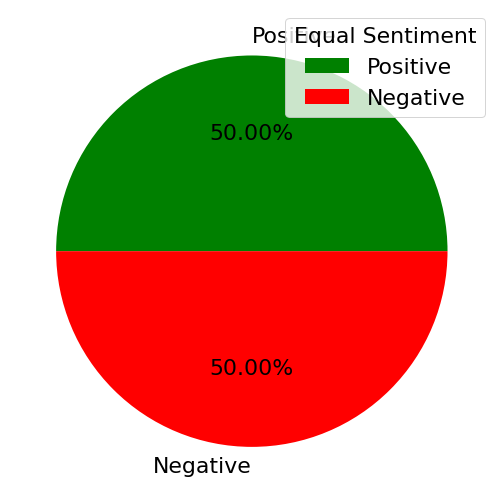

In [44]:
import matplotlib.pyplot as plt

mylabels = ["Positive", "Negative"]
mycolors = ["g", "r"]

plt.pie(np_array_final, labels = mylabels, colors = mycolors, autopct="%.2f%%")

plt.rcParams["figure.figsize"] = (16,9)
#plt.rcParams.update({'font.size': 22})
plt.legend(title = "Equal Sentiment")
plt.rc('font', size=22)   
plt.show() 

In [46]:
result_df.to_csv('EqualTrainTest.csv')